In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import ipywidgets as widgets

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/bfro_reports_fall2022.csv")
df.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,location
0,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,1261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,heh i kinda feel a little dumb that im reporti...,"the road is off us rt 80, i dont know the exit...",Warren County,New Jersey,Fall,NaN,NaN,NaN,NaN,438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,...,0.001,0.7,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49,POINT(-72.33093000000001 43.415490000000005)
3,I was northeast of Macy Nebraska along the Mis...,Latitude & Longitude : 42.158230 -96.344197,Thurston County,Nebraska,Spring,Report 59757: Possible daylight sighting of a ...,42.15685,-96.34203,2018-05-25,59757.0,...,0.000,0.0,NaN,1008.07,Partly cloudy in the morning.,10.0,8.25,193.0,3.33,POINT(-96.34203000000001 42.15685)
4,"While this incident occurred a long time ago, ...","Ward County, Just outside of a the Minuteman T...",Ward County,North Dakota,Spring,Report 751: Hunter describes described being s...,48.25422,-101.31660,2000-04-21,751.0,...,NaN,NaN,rain,1011.47,Partly cloudy until evening.,6.0,10.00,237.0,11.14,POINT(-101.3166 48.254220000000004)


In [3]:
na_value = 'NaN'
df.replace(na_value, value=np.nan, inplace=True)
df.dropna(inplace=True)

In [4]:
df.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,location
2,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,...,0.0010,0.70,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49,POINT(-72.33093000000001 43.415490000000005)
19,"I am 45 years old, have spent my whole life in...","Leominster state forest, back side of No Town ...",Worcester County,Massachusetts,Summer,Report 28017: Hikers observe and cast possible...,42.54334,-71.80123,2010-11-08,28017.0,...,0.0195,0.98,rain,1000.84,Rain in the morning.,2.0,6.70,345.0,3.48,POINT(-71.80123 42.54334)
24,"I was hiking in the woods, doing occasional wh...","Vaughn Woods State Park in South Berwick, Maine.",York County,Maine,Winter,Report 56798: Possible track way found in the ...,43.20450,-70.81187,2017-02-14,56798.0,...,0.0006,0.31,snow,1009.95,Overcast overnight.,3.0,9.94,235.0,0.48,POINT(-70.81187 43.2045)
33,It was August of 1977 and I had missed my ride...,"Waterloo Road, near the Sussex - Warren County...",Warren County,New Jersey,Summer,Report 49883: Recollection of a possible late ...,40.89452,-74.79077,2015-10-02,49883.0,...,0.0092,0.99,rain,1022.92,Light rain starting in the afternoon.,3.0,9.16,45.0,2.87,POINT(-74.79077 40.89452)
58,"Since October I have had many howls, wood knoc...",Take Hwy.471 to Dartigo Rd. to the Church of G...,Grant Parish,Louisiana,Winter,Report 56576: Homeowner describes ongoing acti...,31.36800,-92.42200,2017-01-21,56576.0,...,0.0106,0.80,rain,1001.69,Mostly cloudy starting in the afternoon.,4.0,8.11,156.0,2.22,POINT(-92.42200000000001 31.368000000000002)


Output()

/Users/john/miniconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 61514 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ValueError: Image size of 103468x388 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x432 with 1 Axes>

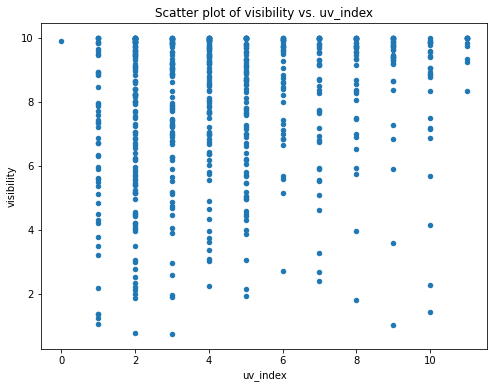

In [8]:
#Make sure to Shift + Return before running to avoid errors
x_column_widget = widgets.Dropdown(options=list(df.columns), description='X field:')
y_column_widget = widgets.Dropdown(options=list(df.columns), description='Y field:')

plot_widget = widgets.Output()

def plot(x_column, y_column):
    plot_widget.clear_output()
    with plot_widget:
        x_dtype = df[x_column].dtype
        y_dtype = df[y_column].dtype

        fig, ax = plt.subplots(figsize=(8, 6))
        if x_dtype == 'object' and y_dtype == 'object':
            df.groupby([x_column, y_column]).size().unstack().plot(kind='bar', ax=ax)
        elif x_dtype == 'object':
            df.plot(x=x_column, y=y_column, kind='strip', ax=ax)
        else:
            df.plot(x=x_column, y=y_column, kind='scatter', ax=ax)
            
        ax.set_title(f'Scatter plot of {y_column} vs. {x_column}')
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)

def on_column_change(change):
    plot(x_column_widget.value, y_column_widget.value)

x_column_widget.observe(on_column_change, names='value')
y_column_widget.observe(on_column_change, names='value')

display(widgets.HBox([x_column_widget, y_column_widget]))
display(plot_widget)

Output()

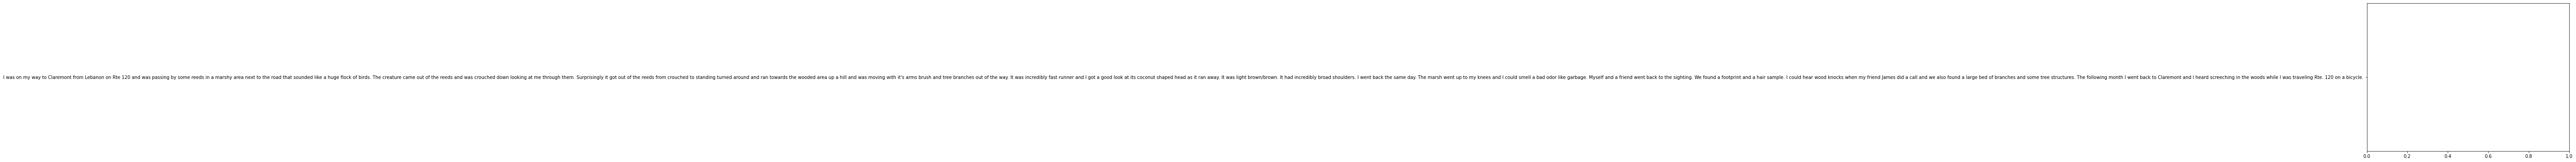

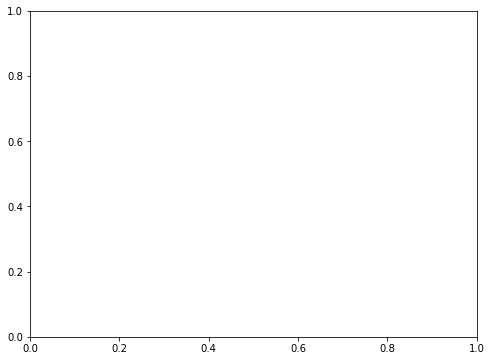

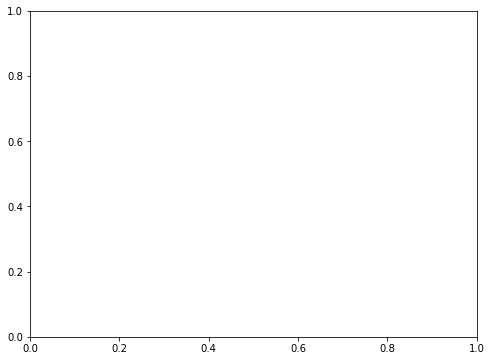

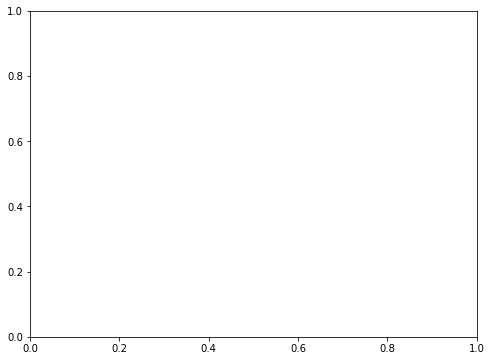

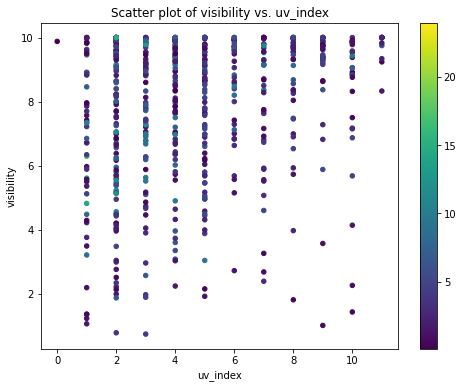

In [9]:
#make sure to Shift + Return before running, so there is no errors
x_column_widget = widgets.Dropdown(options=list(df.columns))
y_column_widget = widgets.Dropdown(options=list(df.columns))
marker_widget = widgets.Dropdown(options=['o', 'v', '.'])
color_widget = widgets.Dropdown(options=list(df.columns))

plot_widget = widgets.Output()

def plot(x_column, y_column, marker, color):
    plot_widget.clear_output()
    with plot_widget:
        x_dtype = df[x_column].dtype
        y_dtype = df[y_column].dtype

        fig, ax = plt.subplots(figsize=(8, 6))
        if x_dtype == 'object' and y_dtype == 'object':
            df.groupby([x_column, y_column]).size().unstack().plot(kind='bar', ax=ax)
        elif x_dtype == 'object':
            df.plot(x=x_column, y=y_column, kind='strip', marker=marker, c=df[color], cmap='viridis', ax=ax)
        else:
            df.plot(x=x_column, y=y_column, kind='scatter', marker=marker, c=df[color], cmap='viridis', ax=ax)
            
        ax.set_title(f'Scatter plot of {y_column} vs. {x_column}')
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)

def on_column_change(change):
    plot(x_column_widget.value, y_column_widget.value, marker_widget.value, color_widget.value)

x_column_widget.observe(on_column_change, names='value')
y_column_widget.observe(on_column_change, names='value')
marker_widget.observe(on_column_change, names='value')
color_widget.observe(on_column_change, names='value')

display(widgets.HBox([x_column_widget, y_column_widget, marker_widget, color_widget]))
display(plot_widget)

Write Up: Plot 1
To create my interactive visualization, I started by creating a plot function that checks the datatype of the x and y variables, and either creates a strip plot or a scatter plot based on the type of data. Numerical data relies on scatter plot. I used the simple widgets dropdown commands to create the dropdown menus for the interactive portion. Some issues I ran into were mainly due to the data being unclean, and the x and y axis having variables that were very difficult for the function to understand. The first plot was created without the option to include color and specify the marker. In order to add that feature in, I simply used the dropdown widget function and included the different marker types from the referenced sheet from class. As you can see, one issue above is the function shows those blank graphs, which is due to function running even after one dropdown selection. So it will create the plot without including each dropdown option.

In [7]:
category_options = ['season', 'state', 'county', 'classification']
numerical_options = ['latitude', 'longitude', 'temperature', 'humidity']
bin_widget = widgets.Dropdown(options=numerical_options, description='Bin')
category_widget = widgets.Dropdown(options=category_options, description='Category')
bins_widget = widgets.IntSlider(min=1, max=50, value=10, description='Bins')

def plot_binned_data(bin_col, category_col, num_bins):
    bin_data = pd.cut(df[bin_col], num_bins)
    agg_data = df.groupby([bin_data, category_col]).size().unstack(fill_value=0)

    ax = agg_data.plot(kind='bar', stacked=True)
    ax.set_xlabel(bin_col)
    ax.set_ylabel('Count')
    plt.show()

widgets.interactive(plot_binned_data, bin_col=bin_widget, category_col=category_widget, num_bins=bins_widget)

interactive(children=(Dropdown(description='Bin', options=('latitude', 'longitude', 'temperature', 'humidity')…

Write Up: Plot 2
This plot was actually very interesting to put together. As opposed to trying to include every single category into the dropdown menu, I just chose latitude, longitude, temperature, and humidity, and then compared that to seasons, state, county, and classification. I used both groupby and the pandas cut command to aggregate the data. Then I just used a simple plot command, and the same widget dropdown commands from the previous plot to create the Bin and Category dropdowns. I also included the IntSlider option to increase the number of bins. It is fun to look at the difference in spread based on how many bins you use on the slider. Excited to use these type of interactive tools with personal data sets and sports. 